In [1]:
#Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


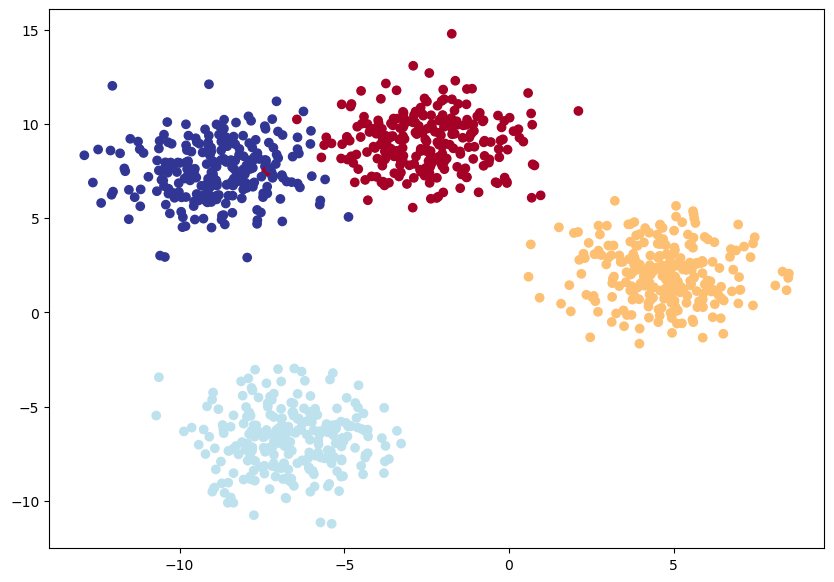

In [2]:
#Hyper parameters for data creation
Num_classes = 4
Num_features = 2
Random_seed = 42
#1. Creating multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=Num_features,
                            centers=Num_classes,
                            cluster_std = 1.5,
                            random_state=Random_seed)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob,
                                                                           y_blob,
                                                                           test_size=0.2,
                                                                           random_state=Random_seed)
#Visualize
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob ,cmap = plt.cm.RdYlBu)

### Building a multi-class classification model

In [3]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device 

'cpu'

In [4]:
## The model
class BlobModel(nn.Module):
    def __init__(self, input_features , output_features, hidden_units =8): 
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self ,x):
        return self.linear_layer_stack(x)
    
model_1 = BlobModel(input_features=2, output_features=4 , hidden_units= 8).to(device)
model_1

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [5]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### Create loss function

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr= 0.1)

### Building a train loop

In [7]:
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_blob_test.to(device))
    
y_logits[:10]

tensor([[ 0.5376,  0.4042,  0.2378, -0.9482],
        [ 0.8051,  0.0013,  0.4926, -0.0476],
        [ 0.3245, -0.0019,  0.0790,  0.0709],
        [ 0.3611,  0.3538, -0.1782, -0.5929],
        [ 1.0614,  0.3651,  0.8645, -1.0502],
        [ 0.8421, -0.1198,  0.6109,  0.0730],
        [ 0.2992, -0.0563,  0.0437,  0.1572],
        [ 0.9996,  0.3082,  0.7136, -0.7533],
        [ 0.3120,  0.0356,  0.0313,  0.0225],
        [ 1.0092,  0.3301,  0.7496, -0.8517]])

In [8]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [9]:
y_pred_probs = torch.softmax(y_logits , dim =1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.5376,  0.4042,  0.2378, -0.9482],
        [ 0.8051,  0.0013,  0.4926, -0.0476],
        [ 0.3245, -0.0019,  0.0790,  0.0709],
        [ 0.3611,  0.3538, -0.1782, -0.5929],
        [ 1.0614,  0.3651,  0.8645, -1.0502]])
tensor([[0.3518, 0.3079, 0.2607, 0.0796],
        [0.3838, 0.1718, 0.2808, 0.1636],
        [0.3049, 0.2200, 0.2385, 0.2366],
        [0.3377, 0.3353, 0.1969, 0.1301],
        [0.4097, 0.2042, 0.3365, 0.0496]])


In [10]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [11]:
y_preds = torch.argmax(y_pred_probs, dim= 1)

In [12]:
y_preds

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
def accuracy_fn(y_true , y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc
    

In [14]:
y_blob_train.dtype

torch.int64

In [15]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_blob_train).squeeze()
    y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train,
                      y_pred = y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ###Testing 
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_blob_test).squeeze()
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim=1)
        #print(test_logits.shape, y_blob_test.shape)    
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test,
                               y_pred = test_preds)
        
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Loss:{loss:.4f}, Acc:{acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")
    
    

Epoch: 0 | Loss:1.3385, Acc:26.12% | Test loss: 1.1595, Test acc: 37.50%
Epoch: 10 | Loss:0.3558, Acc:99.12% | Test loss: 0.2896, Test acc: 100.00%
Epoch: 20 | Loss:0.1260, Acc:99.25% | Test loss: 0.1056, Test acc: 99.50%
Epoch: 30 | Loss:0.0778, Acc:99.25% | Test loss: 0.0641, Test acc: 99.50%
Epoch: 40 | Loss:0.0588, Acc:99.25% | Test loss: 0.0471, Test acc: 99.50%
Epoch: 50 | Loss:0.0490, Acc:99.25% | Test loss: 0.0381, Test acc: 99.50%
Epoch: 60 | Loss:0.0431, Acc:99.25% | Test loss: 0.0326, Test acc: 99.50%
Epoch: 70 | Loss:0.0392, Acc:99.25% | Test loss: 0.0289, Test acc: 99.50%
Epoch: 80 | Loss:0.0365, Acc:99.25% | Test loss: 0.0263, Test acc: 99.50%
Epoch: 90 | Loss:0.0345, Acc:99.25% | Test loss: 0.0243, Test acc: 99.50%


### Making and evaluting predictions with a PyTorch multi-class model

In [16]:
y_logits.shape , y_blob_train.shape

(torch.Size([800, 4]), torch.Size([800]))

In [17]:
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_blob_test)
    
y_logits[:10]

tensor([[ 1.5632,  6.9106, -3.3025, -5.2454],
        [ 2.6976, -6.0478, -0.9182,  7.6543],
        [-1.1028, -3.2046,  7.3505, -0.9423],
        [-0.0648,  4.5328, -1.7961, -2.9205],
        [ 7.2340,  2.7178, -3.6454, -3.3030],
        [ 2.9861, -7.2303, -1.0407,  9.1632],
        [-1.0514, -3.1044,  7.1809, -0.9699],
        [ 6.7670,  0.0274, -2.4860, -0.7469],
        [-1.3986, -3.7334,  8.1446, -0.6548],
        [ 6.8502,  1.0371, -2.8647, -1.7049]])

In [18]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[4.7379e-03, 9.9522e-01, 3.6511e-05, 5.2315e-06],
        [6.9855e-03, 1.1120e-06, 1.8789e-04, 9.9283e-01],
        [2.1310e-04, 2.6047e-05, 9.9951e-01, 2.5018e-04],
        [9.9521e-03, 9.8771e-01, 1.7622e-03, 5.7240e-04],
        [9.8914e-01, 1.0812e-02, 1.8638e-05, 2.6248e-05],
        [2.0720e-03, 7.5764e-08, 3.6948e-05, 9.9789e-01],
        [2.6578e-04, 3.4112e-05, 9.9941e-01, 2.8834e-04],
        [9.9818e-01, 1.1809e-03, 9.5650e-05, 5.4444e-04],
        [7.1673e-05, 6.9397e-06, 9.9977e-01, 1.5079e-04],
        [9.9677e-01, 2.9785e-03, 6.0182e-05, 1.9195e-04]])

In [19]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [20]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [21]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

c:\Users\aelsha33\AppData\Local\anaconda3\envs\ML\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


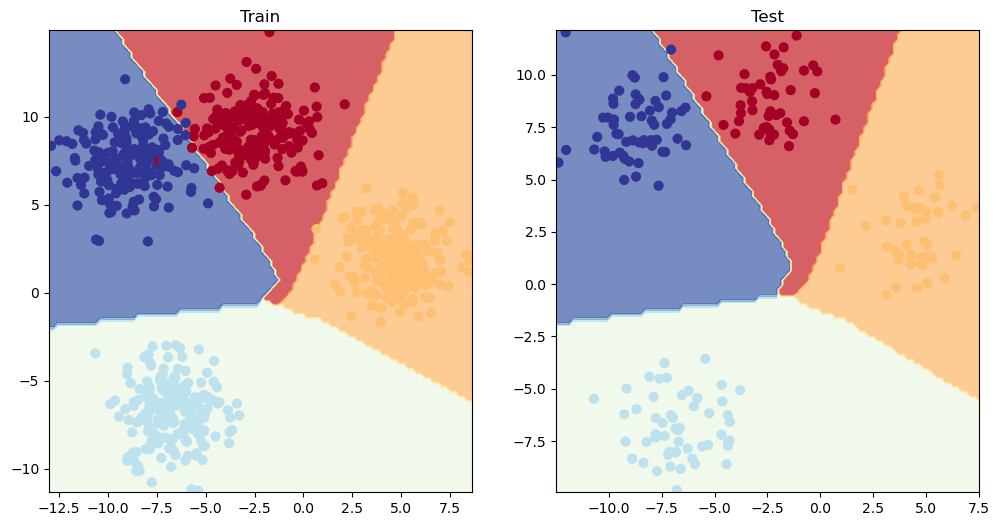

In [22]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)

### A few more classification metrices

* Accuaracy
* Precision
* Recall
* F1-score
* confusion matrix
* Classification report